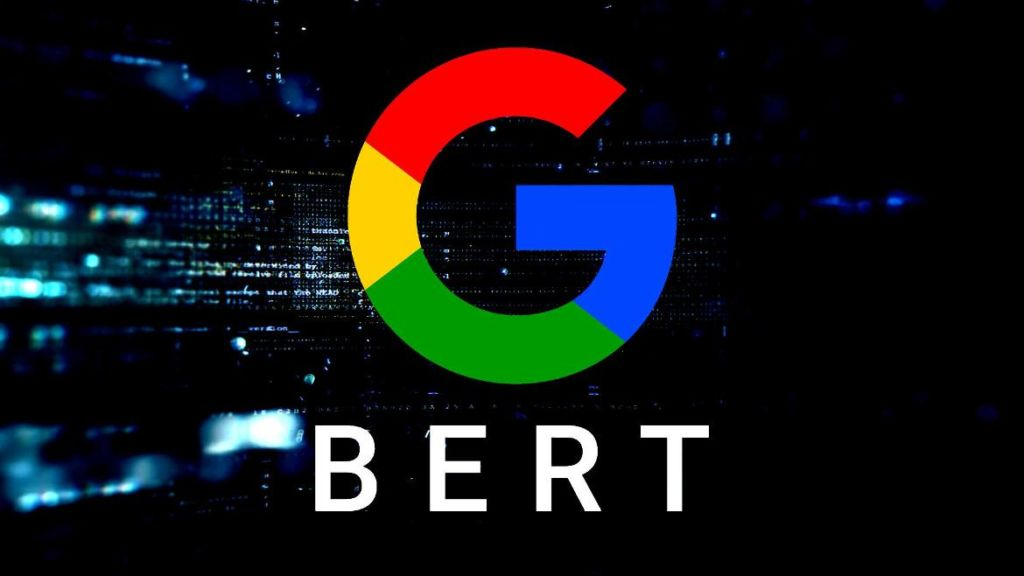<a id="TOC1"></a> <br>

# BERT: Bidirectional Encoder Representations from Transformers

## Table of Contents
1. [**Introduction**](#A1)

    1.1 [**What is BERT?**](#A11)
    
    1.2 [**Architecture**](#A12)
    
    1.3 [**Why we needed BERT?**](#A13)
    
    1.4 [**Core Idea of BERT**](#A14)
    
    1.5 [**How does it work**](#A15)
    
    1.6 [**When can we use it?**](#A16)
    
    1.7 [**How to fine-tune it?**](#A17)
     
1. [**Use Case - Sentence Classification using BERT**](#A2)
    
1. [References](#A3)  

1. [Conclusion](#A4) 

## 1. Introduction <a id="A1"></a> <br>
At the end of 2018 researchers at Google AI Language open-sourced a new technique for Natural Language Processing (NLP) called BERT (Bidirectional Encoder Representations from Transformers) —  a major breakthrough which took the Deep Learning community by storm because of its incredible performance.

### 1.1 What is BERT? <a id="A11"></a> <br>

**BERT** stands for **B**idirectional **E**ncoder **R**epresentations from **T**ransformers. Let us understand this in detail each word .

* **Bidirectional** - to understand the text you’re looking you’ll have to look back (at the previous words) and forward (at the next words)
* **Transformers** - [The Attention Is All You Need](https://arxiv.org/pdf/1706.03762.pdf) paper presented the Transformer model. The Transformer reads entire sequences of tokens at once. In a sense, the model is non-directional, while LSTMs read sequentially (left-to-right or right-to-left). The attention mechanism allows for learning contextual relations between words (e.g. his in a sentence refers to Jim).
* **(Pre-trained) contextualized word embeddings** - [The ELMO paper](https://arxiv.org/pdf/1802.05365v2.pdf) introduced a way to encode words based on their meaning/context. Nails has multiple meanings - fingernails and metal nails.

BERT was trained by masking 15% of the tokens with the goal to guess them. An additional objective was to predict the next sentence.

### 1.2 Architecture <a id="A12"></a> <br>
The original BERT model was developed and trained by Google using TensorFlow. BERT is released in two sizes **BERTBASE** and **BERTLARGE**. 

The BASE model is used to measure the performance of the architecture comparable to another architecture and the LARGE model produces state-of-the-art results that were reported in the research paper.

One of the main reasons for the good performance of BERT on different NLP tasks was the use of **Semi-Supervised Learning**. This means the model is trained for a specific task that enables it to understand the patterns of the language. After training the model (BERT) has language processing capabilities that can be used to empower other models that we build and train using supervised learning.

**BERT** is basically an Encoder stack of transformer architecture. A transformer architecture is an encoder-decoder network that uses self-attention on the encoder side and attention on the decoder side. 

**BERTBASE** has 12 layers in the Encoder stack while **BERTLARGE** has 24 layers in the Encoder stack. These are more than the Transformer architecture described in the original paper (6 encoder layers). 

**BERT** architectures (BASE and LARGE) also have larger feedforward-networks (768 and 1024 hidden units respectively), and more attention heads (12 and 16 respectively) than the Transformer architecture suggested in the original paper. It contains 512 hidden units and 8 attention heads. 

**BERTBASE** contains 110M parameters while BERTLARGE has 340M parameters.

So in summary
* **BERT-Base**: 12 layer Encoder / Decoder, d = 768, 110M parameters
* **BERT-Large**: 24 layer Encoder / Decoder, d = 1024, 340M parameters

where d is the dimensionality of the final hidden vector output by BERT. Both of these have a Cased and an Uncased version (the Uncased version converts all words to lowercase).

![](https://media.geeksforgeeks.org/wp-content/uploads/20200407004114/bert-base-and-large.jpg)

This model takes CLS token as input first, then it is followed by a sequence of words as input. Here CLS is a classification token. It then passes the input to the above layers. Each layer applies self-attention, passes the result through a feedforward network after then it hands off to the next encoder.

The model outputs a vector of hidden size (768 for BERT BASE). If we want to output a classifier from this model we can take the output corresponding to CLS token.
![](https://media.geeksforgeeks.org/wp-content/uploads/20200407005130/BERT-embedding-output.jpg)

### 1.3 Why we needed BERT? <a id="A13"></a> <br>

One of the biggest challenges in NLP is the **lack of enough training data**. Overall there is enormous amount of text data available, but if we want to create task-specific datasets, we need to split that pile into the very many diverse fields. And when we do this, we end up with only a few thousand or a few hundred thousand human-labeled training examples. Unfortunately, in order to perform well, deep learning based NLP models require much larger amounts of data —  they see major improvements when trained on millions, or billions, of annotated training examples. 

To help bridge this gap in data, researchers have developed various techniques for training general purpose language representation models using the enormous piles of unannotated text on the web (this is known as pre-training). These general purpose pre-trained models can then be fine-tuned on smaller task-specific datasets, e.g., when working with problems like question answering and sentiment analysis. This approach results in great accuracy improvements compared to training on the smaller task-specific datasets from scratch. BERT is a recent addition to these techniques for NLP pre-training; it caused a stir in the deep learning community because it presented state-of-the-art results in a wide variety of NLP tasks, like question answering.

The best part about BERT is that it can be download and used for free —  we can either use the  BERT models to extract high quality language features from our text data, or we can fine-tune these models on a specific task, like sentiment analysis and question answering, with our own data to produce state-of-the-art predictions.

In **summary** the following are the main benefits of using BERT:

**Easy Training**

First, the pre-trained BERT model weights already encode a lot of information about our language. As a result, it takes much less time to train our fine-tuned model - it is as if we have already trained the bottom layers of our network extensively and only need to gently tune them while using their output as features for our classification task. In fact, the authors recommend only 2-4 epochs of training for fine-tuning BERT on a specific NLP task (compared to the hundreds of GPU hours needed to train the original BERT model or a LSTM from scratch!).

**Less Data**

In addition and perhaps just as important, because of the pre-trained weights this method allows us to fine-tune our task on a much smaller dataset than would be required in a model that is built from scratch. A major drawback of NLP models built from scratch is that we often need a prohibitively large dataset in order to train our network to reasonable accuracy, meaning a lot of time and energy had to be put into dataset creation. By fine-tuning BERT, we are now able to get away with training a model to good performance on a much smaller amount of training data.

**Good Results**

Second, this simple fine-tuning procedure (typically adding one fully-connected layer on top of BERT and training for a few epochs) was shown to achieve state of the art results with minimal task-specific adjustments for a wide variety of tasks: classification, language inference, semantic similarity, question answering, etc. Rather than implementing custom and sometimes-obscure architetures shown to work well on a specific task, simply fine-tuning BERT is shown to be a better (or at least equal) alternative.

**A Shift in NLP**

This shift to transfer learning parallels the same shift that took place in computer vision a few years ago. Creating a good deep learning network for computer vision tasks can take millions of parameters and be very expensive to train. Researchers discovered that deep networks learn hierarchical feature representations (simple features like edges at the lowest layers with gradually more complex features at higher layers). Rather than training a new network from scratch each time, the lower layers of a trained network with generalized image features could be copied and transfered for use in another network with a different task. It soon became common practice to download a pre-trained deep network and quickly retrain it for the new task or add additional layers on top - vastly preferable to the expensive process of training a network from scratch. For many, the introduction of deep pre-trained language models in 2018 (ELMO, BERT, ULMFIT, Open-GPT, etc.) signals the same shift to transfer learning in NLP that computer vision saw.


### 1.4 Core Idea of BERT <a id="A14"></a> <br>

What is language modeling really about? Which problem are language models trying to solve? Basically, their task is to “fill in the blank” based on context. For example, given

“The woman went to the store and bought a _____ of shoes.”

a language model might complete this sentence by saying that the word “cart” would fill the blank 20% of the time and the word “pair” 80% of the time.

In the pre-BERT world, a language model would have looked at this text sequence during training from either left-to-right or combined left-to-right and right-to-left. This one-directional approach works well for generating sentences — we can predict the next word, append that to the sequence, then predict the next to next word until we have a complete sentence.

Now enters BERT, a language model which is bidirectionally trained (this is also its key technical innovation). This means we can now have a deeper sense of language context and flow compared to the single-direction language models.

Instead of predicting the next word in a sequence, BERT makes use of a novel technique called **Masked LM** (MLM): it randomly masks words in the sentence and then it tries to predict them. Masking means that the model looks in both directions and it uses the full context of the sentence, both left and right surroundings, in order to predict the masked word. Unlike the previous language models, it takes both the previous and next tokens into account at the same time. The existing combined left-to-right and right-to-left LSTM based models were missing this “same-time part”. (It might be more accurate to say that BERT is non-directional though.)

But why is this non-directional approach so powerful? 

Pre-trained language representations can either be context-free or context-based. Context-based representations can then be unidirectional or bidirectional. Context-free models like word2vec generate a single word embedding representation (a vector of numbers) for each word in the vocabulary.

For example, the word “bank” would have the same context-free representation in “bank account” and “bank of the river.” On the other hand, context-based models generate a representation of each word that is based on the other words in the sentence. For example, in the sentence “I accessed the bank account,” a unidirectional contextual model would represent “bank” based on “I accessed the” but not “account.” However, BERT represents “bank” using both its previous and next context — “I accessed the … account” — starting from the very bottom of a deep neural network, making it deeply bidirectional.
![](https://i0.wp.com/mlexplained.com/wp-content/uploads/2019/01/Screen-Shot-2019-01-03-at-11.22.11-AM.png?fit=750%2C192)

It’s evident from the above image: BERT is bi-directional, GPT is unidirectional (information flows only from left-to-right), and ELMO is shallowly bidirectional.

BERT is based on the Transformer model architecture, instead of LSTMs. We will very soon see the model details of BERT, but in general:

A Transformer works by performing a small, constant number of steps. In each step, it applies an attention mechanism to understand relationships between all words in a sentence, regardless of their respective position. For example, given the sentence,  “I arrived at the bank after crossing the river”, to determine that the word “bank” refers to the shore of a river and not a financial institution, the Transformer can learn to immediately pay attention to the word “river” and make this decision in just one step.

### 1.5 How does it work? <a id="A15"></a> <br>
BERT relies on a Transformer (the attention mechanism that learns contextual relationships between words in a text). A basic Transformer consists of an encoder to read the text input and a decoder to produce a prediction for the task. Since BERT’s goal is to generate a language representation model, it only needs the encoder part. The input to the encoder for BERT is a sequence of tokens, which are first converted into vectors and then processed in the neural network. But before processing can start, BERT needs the input to be massaged and decorated with some extra metadata:

* **Token embeddings**: A  token is added to the input word tokens at the beginning of the first sentence and a  token is inserted at the end of each sentence.
* **Segment embeddings**: A marker indicating Sentence A or Sentence B is added to each token. This allows the encoder to distinguish between sentences.
* **Positional embeddings**: A positional embedding is added to each token to indicate its position in the sentence.
![](https://towardsml.files.wordpress.com/2019/09/input.png?w=810)
The input representation for BERT: The input embeddings are the sum of the token embeddings, the segmentation embeddings and the position embeddings.
 

Essentially, the Transformer stacks a layer that maps sequences to sequences, so the output is also a sequence of vectors with a 1:1 correspondence between input and output tokens at the same index. And as we learnt earlier, BERT does not try to predict the next word in the sentence. 

BERT is pre-trained on two NLP tasks:

**1. Masked Language Modeling (MLM)**

BERT is designed as a deeply bidirectional model. The network effectively captures information from both the right and left context of a token from the first layer itself and all the way through to the last layer.

Traditionally, we had language models either trained to predict the next word in a sentence (right-to-left context used in GPT) or language models that were trained on a left-to-right context. This made our models susceptible to errors due to loss in information.

Let us take an example to understand it better

Let’s say we have a sentence – “I love to read data science blogs on Kaggle”. We want to train a bi-directional language model. Instead of trying to predict the next word in the sequence, we can build a model to predict a missing word from within the sequence itself.

Let’s replace “Kaggle” with “[MASK]”. This is a token to denote that the token is missing. We’ll then train the model in such a way that it should be able to predict “Kaggle” as the missing token: “I love to read data science blogs on [MASK].”

This is the crux of a Masked Language Model. The authors of BERT also include some caveats to further improve this technique:

To prevent the model from focusing too much on a particular position or tokens that are masked, the researchers randomly masked 15% of the words.

The masked words were not always replaced by the masked tokens [MASK] because the [MASK] token would never appear during fine-tuning.

So, the researchers used the below technique:

* 80% of the time the words were replaced with the masked token [MASK]
* 10% of the time the words were replaced with random words
* 10% of the time the words were left unchanged


**2. Next Sentence Prediction (NSP)**

**Masked Language Models (MLMs)** learn to understand the relationship between words. Additionally, BERT is also trained on the task of Next Sentence Prediction for tasks that require an understanding of the relationship between sentences.

In order to understand relationship between two sentences, BERT training process also uses next sentence prediction. A pre-trained model with this kind of understanding is relevant for tasks like question answering. During training the model gets as input pairs of sentences and it learns to predict if the second sentence is the next sentence in the original text as well.

As we have seen earlier, BERT separates sentences with a special [SEP] token. During training the model is fed with two input sentences at a time such that:

* 50% of the time the second sentence comes after the first one.
* 50% of the time it is a a random sentence from the full corpus.

BERT is then required to predict whether the second sentence is random or not, with the assumption that the random sentence will be disconnected from the first sentence:
![](https://towardsml.files.wordpress.com/2019/09/nsp-1.png)

To predict if the second sentence is connected to the first one or not, basically the complete input sequence goes through the Transformer based model, the output of the [CLS] token is transformed into a 2×1 shaped vector using a simple classification layer, and the IsNext-Label is assigned using softmax.

The model is trained with both Masked LM and Next Sentence Prediction together. This is to minimize the combined loss function of the two strategies — “together is better”.

### 1.6 When can we use it? <a id="A16"></a> <br>

BERT outperformed the state-of-the-art across a wide variety of tasks under general language understanding like

* **Natural Language Inference**
* **Sentiment Analysis**
* **Question Answering** 
* **Paraphrase detection**
* **Linguistic Acceptability**

### 1.7 How to fine-tune BERT? <a id="A17"></a> <br>
![](https://www.researchgate.net/publication/340295341/figure/fig1/AS:874992090771456@1585625779336/BERT-architecture-1.jpg)
Using BERT for a specific task is relatively straightforward:

BERT can be used for a wide variety of language tasks, while only adding a small layer to the core model:
1. Classification tasks such as sentiment analysis are done similarly to Next Sentence classification, by adding a classification layer on top of the Transformer output for the [CLS] token.
1. In Question Answering tasks (e.g. SQuAD v1.1), the software receives a question regarding a text sequence and is required to mark the answer in the sequence. Using BERT, a Q&A model can be trained by learning two extra vectors that mark the beginning and the end of the answer.
![](https://blog.scaleway.com/content/images/2019/08/squadbert.jpeg)
1. In Named Entity Recognition (NER), the software receives a text sequence and is required to mark the various types of entities (Person, Organization, Date, etc) that appear in the text. Using BERT, a NER model can be trained by feeding the output vector of each token into a classification layer that predicts the NER label.
1. In the fine-tuning training, most hyper-parameters stay the same as in BERT training, and the paper gives specific guidance on the hyper-parameters that require tuning. The BERT team has used this technique to achieve state-of-the-art results on a wide variety of challenging natural language tasks.

## 2. Use Case - Sentence Classification using BERT <a id="A2"></a> <br>


Let us setup and install the pytorch interface for BERT by Hugging Face. (This library contains interfaces for other pretrained language models like OpenAI's GPT and GPT-2.) I have selected the pytorch interface because it strikes a nice balance between the high-level APIs and tensorflow code .

In [1]:
import tensorflow as tf

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

Found GPU at: /device:GPU:0


In order for torch to use the GPU, we need to identify and specify the GPU as the device. Later, in our training loop, we will load data onto the device.

In [2]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla P100-PCIE-16GB


Next, let's install the transformers package from Hugging Face which will give us a pytorch interface for working with BERT. (This library contains interfaces for other pretrained language models like OpenAI's GPT and GPT-2.) We've selected the pytorch interface because it strikes a nice balance between the high-level APIs (which are easy to use but don't provide insight into how things work) and tensorflow code (which contains lots of details but often sidetracks us into lessons about tensorflow, when the purpose here is BERT!).

At the moment, the Hugging Face library seems to be the most widely accepted and powerful pytorch interface for working with BERT. In addition to supporting a variety of different pre-trained transformer models, the library also includes pre-built modifications of these models suited to your specific task. For example, in this tutorial we will use BertForSequenceClassification.

The library also includes task-specific classes for token classification, question answering, next sentence prediciton, etc. Using these pre-built classes simplifies the process of modifying BERT for your purposes.

In [3]:
!pip install pytorch-pretrained-bert pytorch-nlp

     |████████████████████████████████| 90 kB 2.1 MB/s 
     |████████████████████████████████| 123 kB 9.8 MB/s 
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [4]:
## Installing the Hugging Face Library

!pip install transformers

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


### Load Dataset:

I will be using **The Corpus of Linguistic Acceptability (CoLA) dataset** for single sentence classification. 

It's a set of sentences labeled as grammatically correct or incorrect. The data is as follows:

Column 1: the code representing the source of the sentence.

Column 2: the acceptability judgment label (0=unacceptable, 1=acceptable).

Column 3: the acceptability judgment as originally notated by the author.

Column 4: the sentence.

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv("../input/cola-the-corpus-of-linguistic-acceptability/cola_public/raw/in_domain_train.tsv", delimiter='\t', header=None, names=['sentence_source', 'label', 'label_notes', 'sentence'])

In [7]:
df.shape

(8551, 4)

In [8]:
df.sample(10)

,sentence_source,label,label_notes,sentence
5037,ks08,1,NaN,It is unclear why she told him.
8015,ad03,0,*,She has kissed she.
7158,sks13,1,NaN,No boys will put a picture of Bill on your des...
8360,ad03,1,NaN,"When dining with evil crocodiles, it is advisa..."
1925,r-67,1,NaN,My binoculars were given to that girl by him.
18,gj04,0,*,They drank the pub.
5706,c_13,1,NaN,Bruce loved and Kelly hated phonology class.
3154,l-93,0,*,The fear shivered Sharon.
7003,sgww85,1,NaN,Kim sang and Sandy danced.
6568,g_81,0,*,Where and when did Bill put the book?



The two properties we actually care about are the the sentence and its label, which is referred to as the "acceptibility judgment" (0=unacceptable, 1=acceptable).

Here are five sentences which are labeled as not grammatically acceptible. Note how much more difficult this task is than something like sentiment analysis!

In [9]:
df.loc[df.label == 0].sample(5)[['sentence', 'label']]

,sentence,label
6185,Which cake did you see the man who baked?,0
8083,Did Medea poison who?,0
3974,Oliver mentioned Charles the problem.,0
1915,Bartlett and danced Toni.,0
3990,They want to wrote to her.,0


Let's extract the sentences and labels of our training set as numpy ndarrays.

In [10]:
# Get the lists of sentences and their labels.
sentences = df.sentence.values
labels = df.label.values

### Tokenization & Input Formatting

In this section, we'll transform our dataset into the format that BERT can be trained on.

### BERT Tokenizer
To feed our text to BERT, it must be split into tokens, and then these tokens must be mapped to their index in the tokenizer vocabulary.

The tokenization must be performed by the tokenizer included with BERT--the below cell will download this for us. We'll be using the "uncased" version here.

In [11]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Loading BERT tokenizer...


In [12]:
tokenizer

PreTrainedTokenizer(name_or_path='bert-base-uncased', vocab_size=30522, model_max_len=512, is_fast=False, padding_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})

Let's apply the tokenizer to one sentence just to see the output.

In [13]:
# Print the original sentence.
print(' Original: ', sentences[0])

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(sentences[0]))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences[0])))

 Original:  Our friends won't buy this analysis, let alone the next one we propose.
Tokenized:  ['our', 'friends', 'won', "'", 't', 'buy', 'this', 'analysis', ',', 'let', 'alone', 'the', 'next', 'one', 'we', 'propose', '.']
Token IDs:  [2256, 2814, 2180, 1005, 1056, 4965, 2023, 4106, 1010, 2292, 2894, 1996, 2279, 2028, 2057, 16599, 1012]


When we actually convert all of our sentences, we'll use the tokenize.encode function to handle both steps, rather than calling tokenize and convert_tokens_to_ids separately.

Before we can do that, though, we need to talk about some of BERT's formatting requirements.

### Required Formatting
The above code left out a few required formatting steps that we'll look at here.

Side Note: The input format to BERT seems "over-specified" to me... We are required to give it a number of pieces of information which seem redundant, or like they could easily be inferred from the data without us explicity providing it. But it is what it is, and I suspect it will make more sense once I have a deeper understanding of the BERT internals.

We are required to:

1. Add special tokens to the start and end of each sentence.
2. Pad & truncate all sentences to a single constant length.
3. Explicitly differentiate real tokens from padding tokens with the "attention mask".

#### Special Tokens
**[SEP]**

At the end of every sentence, we need to append the special **[SEP]** token.

This token is an artifact of two-sentence tasks, where BERT is given two separate sentences and asked to determine something (e.g., can the answer to the question in sentence A be found in sentence B?).

I am not certain yet why the token is still required when we have only single-sentence input, but it is!

**[CLS]**

For classification tasks, we must prepend the special **[CLS]** token to the beginning of every sentence.

This token has special significance. BERT consists of 12 Transformer layers. Each transformer takes in a list of token embeddings, and produces the same number of embeddings on the output (but with the feature values changed, of course!).

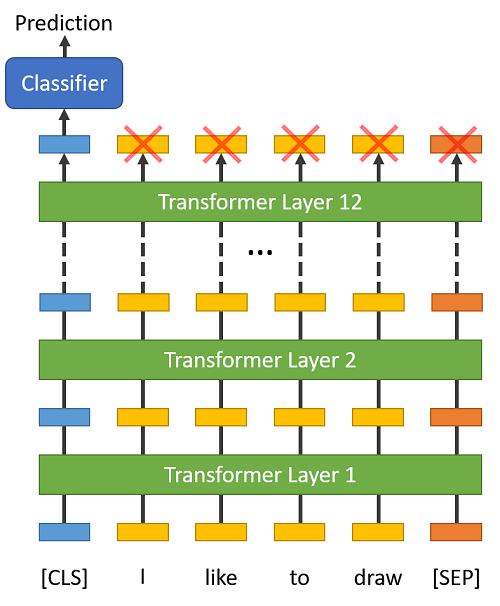

On the output of the final (12th) transformer, only the first embedding (corresponding to the [CLS] token) is used by the classifier.

> "The first token of every sequence is always a special classification token (**[CLS]**). The final hidden state corresponding to this token is used as the aggregate sequence representation for classification tasks." (from the [BERT paper](https://arxiv.org/pdf/1810.04805.pdf))

I'm not sure why the authors took this strategy instead of some kind of pooling of all the final vectors, but I'm sure that if pooling were better they would have gone that route.

Also, because BERT is trained to only use this [CLS] token for classification, we know that the model has been motivated to encode everything it needs for the classification step into that single 768-value embedding vector.

### Sentence Length & Attention Mask

The sentences in our dataset obviously have varying lengths, so how does BERT handle this?

BERT has two constraints:

1. All sentences must be padded or truncated to a single, fixed length.
2. The maximum sentence length is 512 tokens.
3. Padding is done with a special [PAD] token, which is at index 0 in the BERT vocabulary. The below illustration demonstrates padding out to a "MAX_LEN" of 8 tokens.

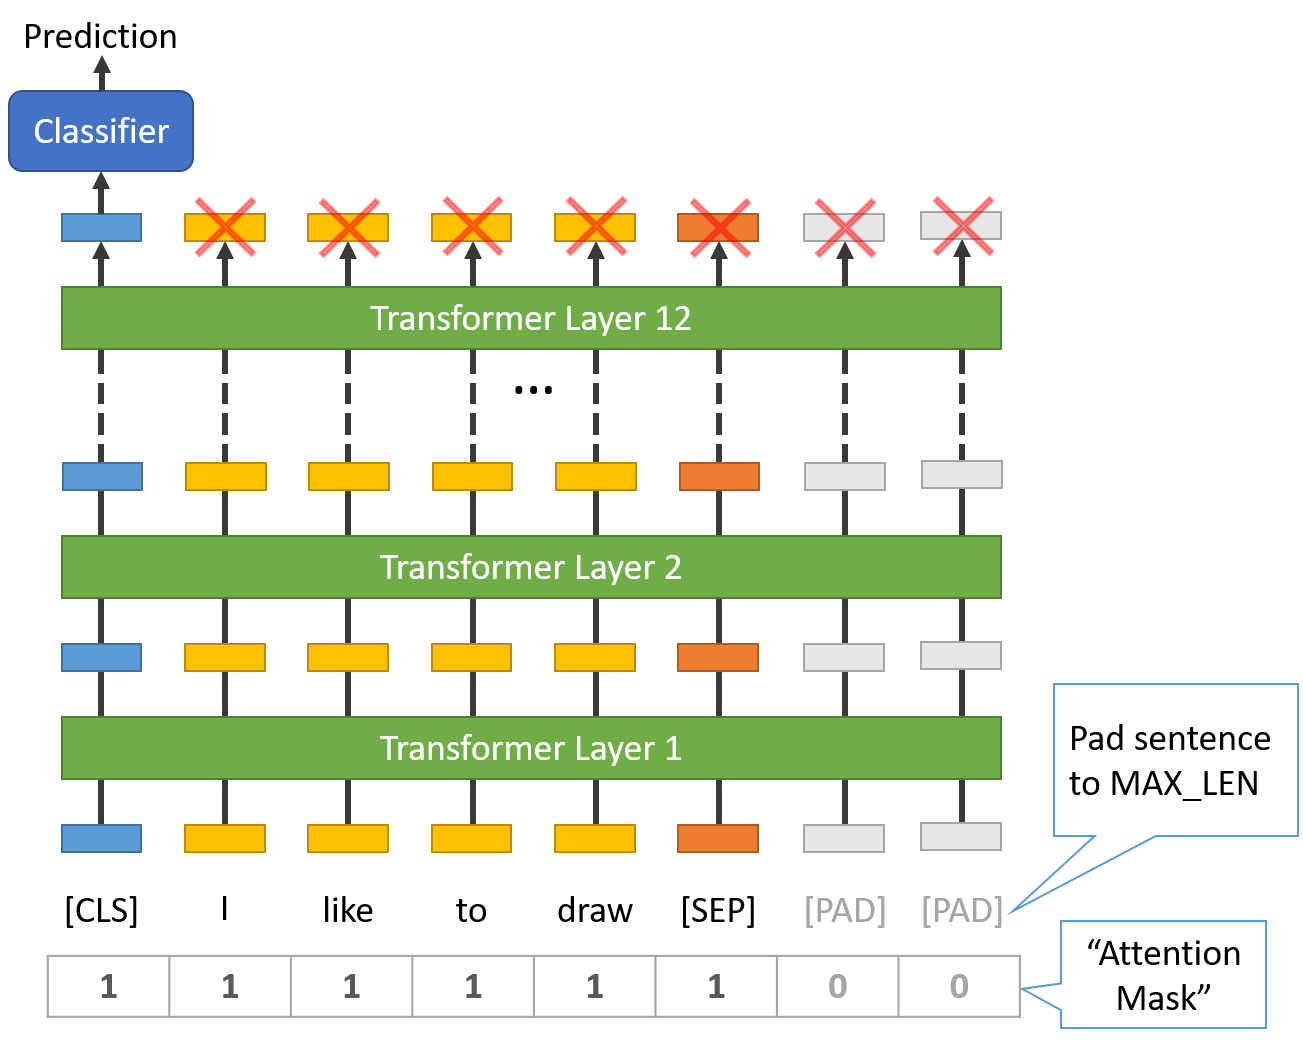

The "Attention Mask" is simply an array of 1s and 0s indicating which tokens are padding and which aren't (seems kind of redundant, doesn't it?! Again, I don't currently know why).

I've experimented with running this notebook with two different values of MAX_LEN, and it impacted both the training speed and the test set accuracy.

With a Tesla K80 and:

MAX_LEN = 128  -->  Training epochs take ~5:28 each, score is 0.535
MAX_LEN = 64   -->  Training epochs take ~2:57 each, score is 0.566
These results suggest to me that the padding tokens aren't simply skipped over--that they are in fact fed through the model and incorporated in the results (thereby impacting both model speed and accuracy). I'll have to dig into the architecture more to understand this.

### Sentences to IDs

The tokenizer.encode function combines multiple steps for us:

1. Split the sentence into tokens.
2. Add the special [CLS] and [SEP] tokens.
3. Map the tokens to their IDs.
4. Oddly, this function can perform truncating for us, but doesn't handle padding.

In [14]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []

# For every sentence...
for sent in sentences:
    # `encode` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    encoded_sent = tokenizer.encode(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'

                        # This function also supports truncation and conversion
                        # to pytorch tensors, but we need to do padding, so we
                        # can't use these features :( .
                        #max_length = 128,          # Truncate all sentences.
                        #return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.
    input_ids.append(encoded_sent)

# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])

Original:  Our friends won't buy this analysis, let alone the next one we propose.
Token IDs: [101, 2256, 2814, 2180, 1005, 1056, 4965, 2023, 4106, 1010, 2292, 2894, 1996, 2279, 2028, 2057, 16599, 1012, 102]


### Padding & Truncating

Pad and truncate our sequences so that they all have the same length, MAX_LEN.

First, what's the maximum sentence length in our dataset?

In [15]:
print('Max sentence length: ', max([len(sen) for sen in input_ids]))

Max sentence length:  47


Given that, let's choose MAX_LEN = 64 and apply the padding.

In [16]:
# We'll borrow the `pad_sequences` utility function to do this.
from keras.preprocessing.sequence import pad_sequences

# Set the maximum sequence length.
# I've chosen 64 somewhat arbitrarily. It's slightly larger than the
# maximum training sentence length of 47...
MAX_LEN = 64

print('\nPadding/truncating all sentences to %d values...' % MAX_LEN)

print('\nPadding token: "{:}", ID: {:}'.format(tokenizer.pad_token, tokenizer.pad_token_id))

# Pad our input tokens with value 0.
# "post" indicates that we want to pad and truncate at the end of the sequence,
# as opposed to the beginning.
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", 
                          value=0, truncating="post", padding="post")

print('\nDone.')


Padding/truncating all sentences to 64 values...

Padding token: "[PAD]", ID: 0

Done.


### Attention Masks
The attention mask simply makes it explicit which tokens are actual words versus which are padding.

The BERT vocabulary does not use the ID 0, so if a token ID is 0, then it's padding, and otherwise it's a real token.

In [17]:
# Create attention masks
attention_masks = []

# For each sentence...
for sent in input_ids:
    
    # Create the attention mask.
    #   - If a token ID is 0, then it's padding, set the mask to 0.
    #   - If a token ID is > 0, then it's a real token, set the mask to 1.
    att_mask = [int(token_id > 0) for token_id in sent]
    
    # Store the attention mask for this sentence.
    attention_masks.append(att_mask)

### Training & Validation Split
Divide up our training set to use 90% for training and 10% for validation.

In [18]:
# Use train_test_split to split our data into train and validation sets for
# training
from sklearn.model_selection import train_test_split

# Use 90% for training and 10% for validation.
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, labels, 
                                                            random_state=2018, test_size=0.1)
# Do the same for the masks.
train_masks, validation_masks, _, _ = train_test_split(attention_masks, labels,
                                             random_state=2018, test_size=0.1)

### Converting to PyTorch Data Types
Our model expects PyTorch tensors rather than numpy.ndarrays, so convert all of our dataset variables.

In [19]:
# Convert all inputs and labels into torch tensors, the required datatype 
# for our model.
train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)

train_labels = torch.tensor(train_labels)
validation_labels = torch.tensor(validation_labels)

train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)

We'll also create an iterator for our dataset using the torch DataLoader class. This helps save on memory during training because, unlike a for loop, with an iterator the entire dataset does not need to be loaded into memory.

In [20]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it 
# here.
# For fine-tuning BERT on a specific task, the authors recommend a batch size of
# 16 or 32.

batch_size = 32

# Create the DataLoader for our training set.
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create the DataLoader for our validation set.
validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

### Train Our Classification Model
Now that our input data is properly formatted, it's time to fine tune the BERT model.

### BertForSequenceClassification
For this task, we first want to modify the pre-trained BERT model to give outputs for classification, and then we want to continue training the model on our dataset until that the entire model, end-to-end, is well-suited for our task.

Thankfully, the huggingface pytorch implementation includes a set of interfaces designed for a variety of NLP tasks. Though these interfaces are all built on top of a trained BERT model, each has different top layers and output types designed to accomodate their specific NLP task.

Here is the current list of classes provided for fine-tuning:

* BertModel
* BertForPreTraining
* BertForMaskedLM
* BertForNextSentencePrediction
* BertForSequenceClassification - The one we'll use.
* BertForTokenClassification
* BertForQuestionAnswering

The documentation for these can be found under [here](https://huggingface.co/transformers/v2.2.0/model_doc/bert.html).

We'll be using [BertForSequenceClassification](https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#bertforsequenceclassification). This is the normal BERT model with an added single linear layer on top for classification that we will use as a sentence classifier. As we feed input data, the entire pre-trained BERT model and the additional untrained classification layer is trained on our specific task.

OK, let's load BERT! There are a few different pre-trained BERT models available. "bert-base-uncased" means the version that has only lowercase letters ("uncased") and is the smaller version of the two ("base" vs "large").

The documentation for from_pretrained can be found [here](https://huggingface.co/transformers/v2.2.0/main_classes/model.html#transformers.PreTrainedModel.from_pretrained), with the additional parameters defined [here](https://huggingface.co/transformers/v2.2.0/main_classes/configuration.html#transformers.PretrainedConfig).

In [21]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 2, # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.   
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model.cuda()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element


Just for curiosity's sake, we can browse all of the model's parameters by name here.

In the below cell, I've printed out the names and dimensions of the weights for:

1. The embedding layer.
2. The first of the twelve transformers.
3. The output layer.

In [22]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 201 different named parameters.

==== Embedding Layer ====

bert.embeddings.word_embeddings.weight                  (30522, 768)
bert.embeddings.position_embeddings.weight                (512, 768)
bert.embeddings.token_type_embeddings.weight                (2, 768)
bert.embeddings.LayerNorm.weight                              (768,)
bert.embeddings.LayerNorm.bias                                (768,)

==== First Transformer ====

bert.encoder.layer.0.attention.self.query.weight          (768, 768)
bert.encoder.layer.0.attention.self.query.bias                (768,)
bert.encoder.layer.0.attention.self.key.weight            (768, 768)
bert.encoder.layer.0.attention.self.key.bias                  (768,)
bert.encoder.layer.0.attention.self.value.weight          (768, 768)
bert.encoder.layer.0.attention.self.value.bias                (768,)
bert.encoder.layer.0.attention.output.dense.weight        (768, 768)
bert.encoder.layer.0.attention.output.dense.bias              (

### Optimizer & Learning Rate Scheduler

Now that we have our model loaded we need to grab the training hyperparameters from within the stored model.

For the purposes of fine-tuning, the authors recommend choosing from the following values:

Batch size: 16, 32 (We chose 32 when creating our DataLoaders).
Learning rate (Adam): 5e-5, 3e-5, 2e-5 (We'll use 2e-5).
Number of epochs: 2, 3, 4 (We'll use 4).
The epsilon parameter eps = 1e-8 is "a very small number to prevent any division by zero in the implementation" (from [here](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/)).

You can find the creation of the AdamW optimizer in run_glue.py [here](https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L109).

In [23]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
# I believe the 'W' stands for 'Weight Decay fix"
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

In [24]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs (authors recommend between 2 and 4)
epochs = 4

# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)
scheduler

### Training Loop

Below is our training loop. There's a lot going on, but fundamentally for each pass in our loop we have a trianing phase and a validation phase. At each pass we need to:

Training loop:

Unpack our data inputs and labels
Load data onto the GPU for acceleration
Clear out the gradients calculated in the previous pass.
In pytorch the gradients accumulate by default (useful for things like RNNs) unless you explicitly clear them out.
Forward pass (feed input data through the network)
Backward pass (backpropagation)
Tell the network to update parameters with optimizer.step()
Track variables for monitoring progress
Evalution loop:

Unpack our data inputs and labels
Load data onto the GPU for acceleration
Forward pass (feed input data through the network)
Compute loss on our validation data and track variables for monitoring progress
So please read carefully through the comments to get an understanding of what's happening. If you're unfamiliar with pytorch a quick look at some of their [beginner tutorials](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py) will help show you that training loops really involve only a few simple steps; the rest is usually just decoration and logging.

Define a helper function for calculating accuracy.

In [25]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [26]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [27]:
import random

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128


# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# Store the average loss after each epoch so we can plot them.
loss_values = []

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # This will return the loss (rather than the model output) because we
        # have provided the `labels`.
        # The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        outputs = model(b_input_ids, 
                    token_type_ids=None, 
                    attention_mask=b_input_mask, 
                    labels=b_labels)
        
        # The call to `model` always returns a tuple, so we need to pull the 
        # loss value out of the tuple.
        loss = outputs[0]

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over the training data.
    avg_train_loss = total_loss / len(train_dataloader)            
    
    # Store the loss value for plotting the learning curve.
    loss_values.append(avg_train_loss)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(format_time(time.time() - t0)))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)
        
        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch
        
        # Telling the model not to compute or store gradients, saving memory and
        # speeding up validation
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # This will return the logits rather than the loss because we have
            # not provided labels.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # The documentation for this `model` function is here: 
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            outputs = model(b_input_ids, 
                            token_type_ids=None, 
                            attention_mask=b_input_mask)
        
        # Get the "logits" output by the model. The "logits" are the output
        # values prior to applying an activation function like the softmax.
        logits = outputs[0]

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        
        # Calculate the accuracy for this batch of test sentences.
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)
        
        # Accumulate the total accuracy.
        eval_accuracy += tmp_eval_accuracy

        # Track the number of batches
        nb_eval_steps += 1

    # Report the final accuracy for this validation run.
    print("  Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
    print("  Validation took: {:}".format(format_time(time.time() - t0)))

print("")
print("Training complete!")


======== Epoch 1 / 4 ========
Training...
  Batch    40  of    241.    Elapsed: 0:00:10.
  Batch    80  of    241.    Elapsed: 0:00:19.
  Batch   120  of    241.    Elapsed: 0:00:28.
  Batch   160  of    241.    Elapsed: 0:00:37.
  Batch   200  of    241.    Elapsed: 0:00:46.
  Batch   240  of    241.    Elapsed: 0:00:55.

  Average training loss: 0.50
  Training epcoh took: 0:00:55

Running Validation...
  Accuracy: 0.78
  Validation took: 0:00:02

======== Epoch 2 / 4 ========
Training...
  Batch    40  of    241.    Elapsed: 0:00:09.
  Batch    80  of    241.    Elapsed: 0:00:18.
  Batch   120  of    241.    Elapsed: 0:00:27.
  Batch   160  of    241.    Elapsed: 0:00:36.
  Batch   200  of    241.    Elapsed: 0:00:45.
  Batch   240  of    241.    Elapsed: 0:00:54.

  Average training loss: 0.31
  Training epcoh took: 0:00:55

Running Validation...
  Accuracy: 0.82
  Validation took: 0:00:02

======== Epoch 3 / 4 ========
Training...
  Batch    40  of    241.    Elapsed: 0:00:09.
  

Let's take a look at our training loss over all batches:

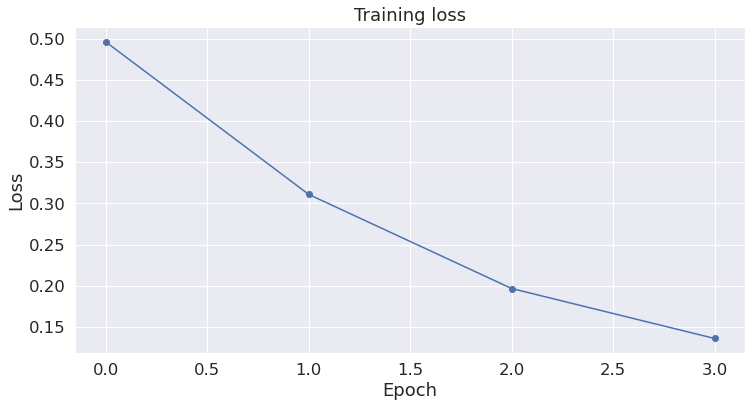

In [28]:
import matplotlib.pyplot as plt


import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(loss_values, 'b-o')

# Label the plot.
plt.title("Training loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.show()

In [29]:
loss_values

[0.4966279048766338,
 0.3109313357636889,
 0.19640160989619143,
 0.13557882286623676]

In [30]:
import plotly.express as px

f = pd.DataFrame(loss_values)
f.columns=['Loss']
fig = px.line(f, x=f.index, y=f.Loss)
fig.update_layout(title='Training loss of the Model',
                   xaxis_title='Epoch',
                   yaxis_title='Loss')
fig.show()

### Performance On Test Set

Now we'll load the holdout dataset and prepare inputs just as we did with the training set. Then we'll evaluate predictions using Matthew's correlation coefficient because this is the metric used by the wider NLP community to evaluate performance on CoLA. With this metric, +1 is the best score, and -1 is the worst score. This way, we can see how well we perform against the state of the art models for this specific task.

### Data Preparation
We'll need to apply all of the same steps that we did for the training data to prepare our test data set.

In [31]:
import pandas as pd

# Load the dataset into a pandas dataframe.
df = pd.read_csv("../input/cola-the-corpus-of-linguistic-acceptability/cola_public/raw/out_of_domain_dev.tsv", delimiter='\t', header=None, names=['sentence_source', 'label', 'label_notes', 'sentence'])

# Report the number of sentences.
print('Number of test sentences: {:,}\n'.format(df.shape[0]))

# Create sentence and label lists
sentences = df.sentence.values
labels = df.label.values

# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []

# For every sentence...
for sent in sentences:
    # `encode` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    encoded_sent = tokenizer.encode(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                   )
    
    input_ids.append(encoded_sent)

# Pad our input tokens
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, 
                          dtype="long", truncating="post", padding="post")

# Create attention masks
attention_masks = []

# Create a mask of 1s for each token followed by 0s for padding
for seq in input_ids:
  seq_mask = [float(i>0) for i in seq]
  attention_masks.append(seq_mask) 

# Convert to tensors.
prediction_inputs = torch.tensor(input_ids)
prediction_masks = torch.tensor(attention_masks)
prediction_labels = torch.tensor(labels)

# Set the batch size.  
batch_size = 32  

# Create the DataLoader.
prediction_data = TensorDataset(prediction_inputs, prediction_masks, prediction_labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

Number of test sentences: 516



### Evaluate on Test Set
With the test set prepared, we can apply our fine-tuned model to generate predictions on the test set.

In [32]:
# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(prediction_inputs)))

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels = [], []

# Predict 
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs = model(b_input_ids, token_type_ids=None, 
                      attention_mask=b_input_mask)

  logits = outputs[0]

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)

print('DONE.')

Predicting labels for 516 test sentences...
DONE.


Accuracy on the CoLA benchmark is measured using the "[Matthews correlation coefficient](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.matthews_corrcoef.html)" (MCC).

We use MCC here because the classes are imbalanced:

In [33]:
print('Positive samples: %d of %d (%.2f%%)' % (df.label.sum(), len(df.label), (df.label.sum() / len(df.label) * 100.0)))

Positive samples: 354 of 516 (68.60%)


In [34]:
from sklearn.metrics import matthews_corrcoef

matthews_set = []

# Evaluate each test batch using Matthew's correlation coefficient
print('Calculating Matthews Corr. Coef. for each batch...')

# For each input batch...
for i in range(len(true_labels)):
  
  # The predictions for this batch are a 2-column ndarray (one column for "0" 
  # and one column for "1"). Pick the label with the highest value and turn this
  # in to a list of 0s and 1s.
  pred_labels_i = np.argmax(predictions[i], axis=1).flatten()
  
  # Calculate and store the coef for this batch.  
  matthews = matthews_corrcoef(true_labels[i], pred_labels_i)                
  matthews_set.append(matthews)

Calculating Matthews Corr. Coef. for each batch...


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:846: RuntimeWarning:

invalid value encountered in double_scalars



The final score will be based on the entire test set, but let's take a look at the scores on the individual batches to get a sense of the variability in the metric between batches.

Each batch has 32 sentences in it, except the last batch which has only (516 % 32) = 4 test sentences in it.

In [35]:
matthews_set

[0.049286405809014416,
 -0.1044465935734187,
 0.4040950971038548,
 0.39405520311955033,
 0.49517597397212765,
 0.7410010097502685,
 0.5962847939999439,
 0.0,
 0.8320502943378436,
 0.7530836820370708,
 0.8459051693633014,
 0.647150228929434,
 0.8150678894028793,
 0.5204956780951701,
 0.2342878320018382,
 0.5056936741642399,
 0.0]

In [36]:
# Combine the predictions for each batch into a single list of 0s and 1s.
flat_predictions = [item for sublist in predictions for item in sublist]
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

# Combine the correct labels for each batch into a single list.
flat_true_labels = [item for sublist in true_labels for item in sublist]

# Calculate the MCC
mcc = matthews_corrcoef(flat_true_labels, flat_predictions)

print('MCC: %.3f' % mcc)

MCC: 0.535


Cool! In about half an hour and without doing any hyperparameter tuning (adjusting the learning rate, epochs, batch size, ADAM properties, etc.) we are able to get a good score.

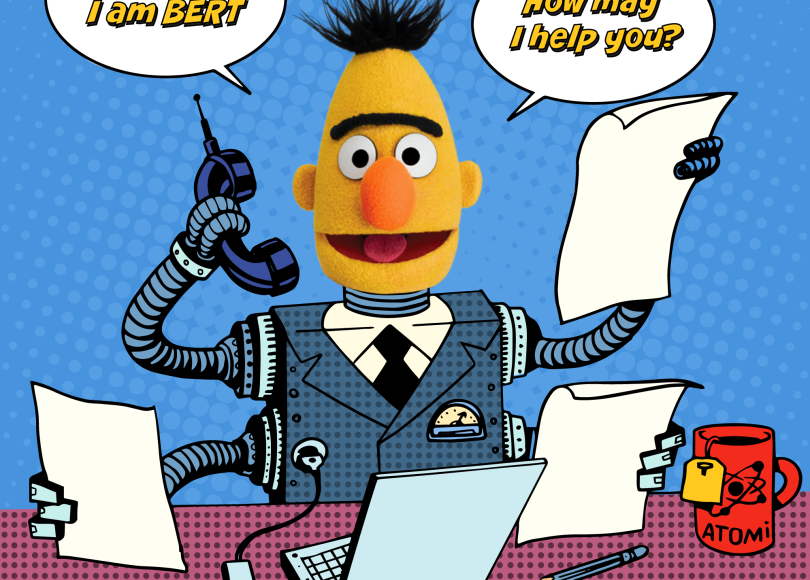

## 3. References <a id="A3"></a> <br>

* https://towardsml.com/2019/09/17/bert-explained-a-complete-guide-with-theory-and-tutorial/
* https://www.analyticsvidhya.com/blog/2019/09/demystifying-bert-groundbreaking-nlp-framework/
* https://towardsdatascience.com/bert-for-dummies-step-by-step-tutorial-fb90890ffe03
* https://towardsml.com/2019/09/17/bert-explained-a-complete-guide-with-theory-and-tutorial/

## 4. Conclusion <a id="A4"></a> <br>
### I hope you have a good understanding on how to use BERT by now .

## Please do leave your comments /suggestions and if you like this notebook please do <font color='red'>UPVOTE